# Build Simple Mushroom Classifier

Load Images for 100 Taxa with 100 Images Each

In [9]:
from pathlib import Path
from fastai.vision.all import *
MO_URL = "https://images.mushroomobserver.org/ac-20.tgz"
path = untar_data(MO_URL)
fnames = get_image_files(path)
SYNONYMS = {
    'Clitocybe_nuda': 'Lepista_nuda',
    'Pluteus_cervinus': 'Pluteus_cervinus_group',
    'Amanita_amerirubescens': 'Amanita_amerirubescens_group',
    'Boletus_edulis': 'Boletus_edulis_group',
    'Coprinellus_micaceus': 'Coprinellus_sect._Micacei',
    'Fomitopsis_pinicola': 'Fomitopsis_pinicola_group',
    'Fomitopsis_mounceae': 'Fomitopsis_pinicola_group',
    'Fomitopsis_ochracea': 'Fomitopsis_pinicola_group',
    'Fomitopsis_schrenkii': 'Fomitopsis_pinicola_group',
}

def label_func(x):
    dirname = x.parent.name
    return SYNONYMS.get(dirname, dirname)

dls = ImageDataLoaders.from_path_func(path, fnames, label_func, item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
learn = vision_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Show Me Some Mushrooms

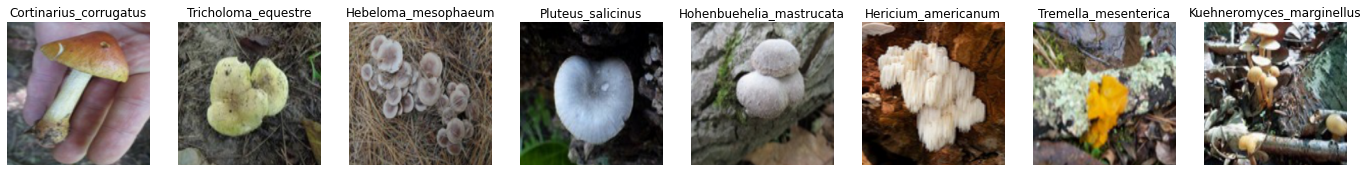

In [10]:
dls.valid.show_batch(max_n=8, nrows=1)

Show Me Some Porcini

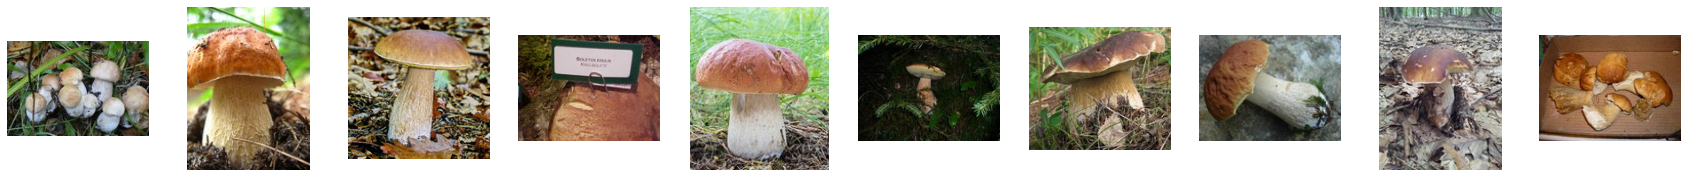

In [11]:
taxon_fnames = get_image_files(path/'Boletus_edulis')
show_images([Image.open(name) for name in taxon_fnames[0:10]])

Show Me Some Names

In [ ]:
dls.vocab

['Agaricus_xanthodermus', 'Agrocybe_pediades', 'Amanita_amerirubescens_group', 'Amanita_bisporigera', 'Amanita_brunnescens', 'Amanita_flavoconia', 'Amanita_flavorubens', 'Amanita_muscaria_subsp._flavivolvata', 'Amanita_muscaria_var._guessowii', 'Amanita_phalloides', 'Amanita_sect._Amanita', 'Amanita_sect._Lepidella', 'Amanita_sect._Phalloideae', 'Amanita_sect._Vaginatae', 'Armillaria_mellea', 'Armillaria_tabescens', 'Artomyces_pyxidatus', 'Bolbitius_titubans', 'Boletus_edulis_group', 'Cantharellus_cinnabarinus', 'Ceratiomyxa_fruticulosa', 'Cerioporus_squamosus', 'Chlorophyllum_molybdites', 'Coprinellus_disseminatus', 'Coprinellus_sect._Micacei', 'Coprinus_comatus', 'Cortinarius_subg._Telamonia', 'Craterellus_fallax', 'Dacrymyces_chrysospermus', 'Daedaleopsis_confragosa', 'Entoloma_abortivum', 'Flammulina_velutipes', 'Fomitopsis_mounceae', 'Fomitopsis_pinicola', 'Fuligo_septica', 'Galerina_marginata', 'Ganoderma_applanatum', 'Gloeophyllum_sepiarium', 'Grifola_frondosa', 'Gymnopus_dryoph

Run Some Training

In [12]:
learn.fine_tune(20)

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
# interp.most_confused()[0:10]

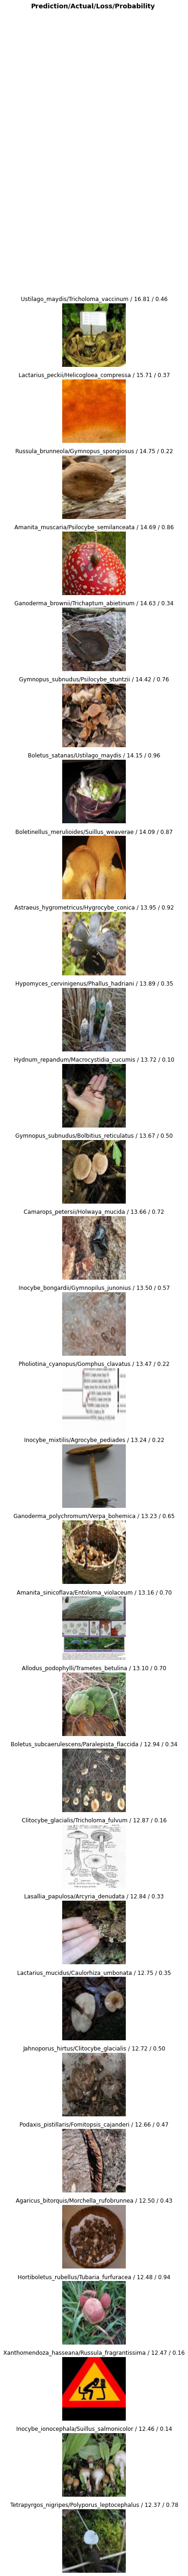

In [14]:
interp.plot_top_losses(30, nrows=30)

In [16]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): print(f"https://mushroomobserver.org/image/show_image/{str(cleaner.fns[idx]).split('/')[-1].split('.')[0]}")

https://mushroomobserver.org/image/show_image/473012
https://mushroomobserver.org/image/show_image/479878
https://mushroomobserver.org/image/show_image/581397
https://mushroomobserver.org/image/show_image/504034
https://mushroomobserver.org/image/show_image/39362
https://mushroomobserver.org/image/show_image/1004741


Save the Model

In [17]:
# learn.save("sample-11x100-model")
learn.save("ac-20-model")

Path('/root/.fastai/data/ac-20/models/ac-20-model.pth')

Reload and Verify the Model

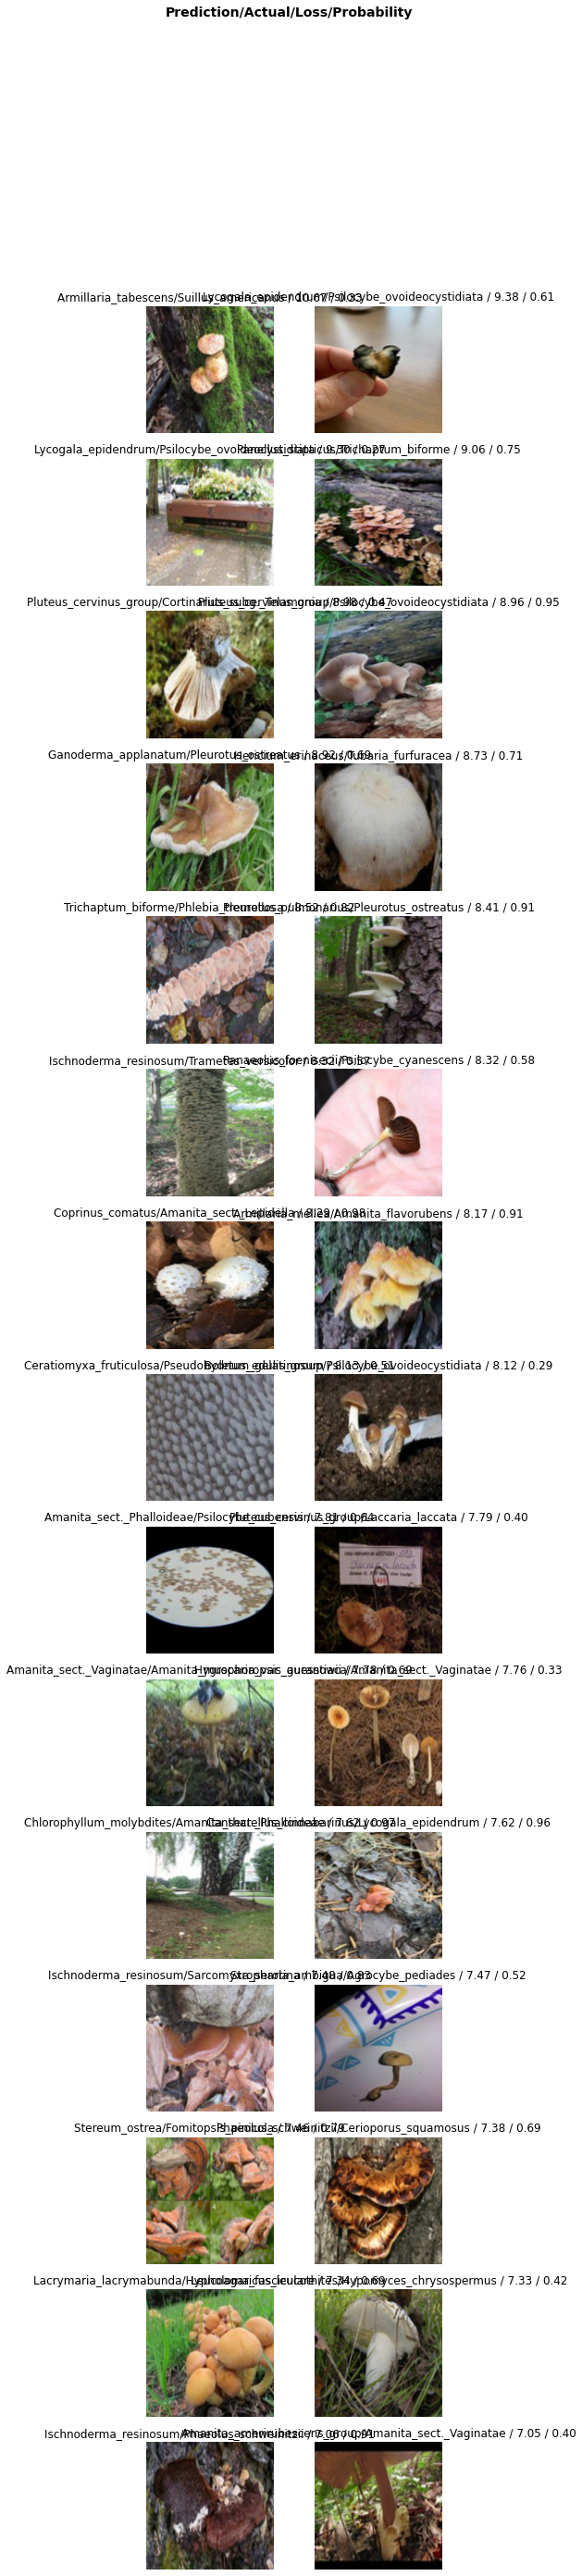

In [ ]:
learn.load("sample-100x100-model")
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(30, nrows=15)

In [18]:
# Copy saved movel to Google Drive so it can be saved and potentially downloaded and used elsewhere
from google.colab import drive
drive.mount('/content/drive')
!cp /root/.fastai/data/ac-20/models/ac-20-model.pth /content/drive/MyDrive

Mounted at /content/drive


In [15]:
import os

download_images("tmp", urls=["https://images.mushroomobserver.org/orig/1400576.jpg"])
os.listdir("tmp")
path = Path("tmp", os.listdir("tmp")[0])
learn.predict(path)

('Agrocybe_molesta',
 TensorBase(21),
 TensorBase([4.3305e-06, 2.4925e-02, 1.5252e-01,  ..., 1.3942e-05,
             1.3746e-06, 1.2713e-05]))